In [90]:
# -*- coding: utf-8 -*-
import pandas as pd
from time import time
import seaborn as sns


import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [92]:
gg = pd.read_excel('Google & Yelp Reviews.xlsx',sheetname=0)
df = gg[~gg['Review'].isnull()]

In [93]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords 
stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 
lemmatize = WordNetLemmatizer()
from nltk.stem.wordnet import WordNetLemmatizer
import string


In [94]:
stop = pd.read_fwf('stop.txt',names=['words'])
stopwords.update(set(stop['words'].values))
# print (list(stopwords)[:10])
stopwords.update(set(['dont','lot','wa','im','ha','doe','wa', 'able',]))

In [95]:
def cleaning(article):
    article = str(article)
    zero = "".join(i for i in article if i not in punctuation)
    
    one = " ".join([i for i in zero.lower().split() if i not in stopwords])
    
    three = " ".join(lemmatize.lemmatize(i) for i in one.split())
    return three

In [96]:
from collections import defaultdict
freq = defaultdict(int)

for i in stopwords:
    freq[i]+=1

In [97]:
print type(freq)
freq['it']

1

### all

In [98]:
# all_content = df['content'].append(holdout['content'])

In [99]:
all_content=df['Review']
apple = all_content

### choices

In [100]:
# nltk.download('wordnet')
start = time()

ap_text = apple.apply(cleaning)
ap_text_list = [i.split() for i in ap_text]
print (len(ap_text_list))

print ('used: {:.2f}s'.format(time()-start))

In [101]:
ap_text[:10]

2     edward schiller service tech complete highly r...
3     product service impressed job foundation compa...
4     tried charge 500 replace sump pump battery rep...
6                                  awesome company deal
7            prompt efficient glad chose company thanks
8                                              time job
9     ive heard masterdry little positive neighbor a...
11    jeremy kevin extremely nice informative extrem...
13                 service tech professional inspection
14                       solve quickly price affordable
Name: Review, dtype: object

In [103]:
from gensim.models.phrases import Phraser, Phrases

start = time()
phs = Phrases(ap_text_list)
('used: {:.2f}s'.format(time()-start))

'used: 0.09s'

In [104]:
bi_gram = Phraser(phs)
start = time()

new_bi_list = [bi_gram[i] for i in ap_text_list]

('used: {:.2f}s'.format(time()-start))

'used: 0.16s'

In [105]:
bi_gram[ap_text_list[0]]

[u'edward', u'schiller', u'service_tech', u'complete', u'highly_recommend']

In [106]:
new_bi_list[0]

[u'edward', u'schiller', u'service_tech', u'complete', u'highly_recommend']

In [107]:
start = time()

phs3=Phrases(new_bi_list)
tri_gram=Phraser(phs3)

('used: {:.2f}s'.format(time()-start))


'used: 0.42s'

In [108]:
start = time()

new_tri_list = [tri_gram[i] for i in new_bi_list]

('used: {:.2f}s'.format(time()-start))


'used: 0.16s'

In [109]:
new_tri_list = new_bi_list

In [110]:
make_dic = dict()
for i,j in zip(range(len(new_tri_list)), new_tri_list):
    make_dic[i]=j

In [111]:
without_stop = pd.Series(make_dic)

In [112]:
without_stop.head(10)

0    [edward, schiller, service_tech, complete, hig...
1    [product, service, impressed, job, foundation,...
2    [tried, charge, 500, replace, sump_pump, batte...
3                             [awesome, company, deal]
4    [prompt, efficient, glad, chose, company, thanks]
5                                          [time, job]
6    [ive, heard, masterdry, little, positive, neig...
7    [jeremy_kevin, extremely, nice, informative, e...
8             [service_tech, professional, inspection]
9                  [solve, quickly, price, affordable]
dtype: object

In [113]:
len(without_stop[0])

5

In [114]:
def helper_len(x):
    leng=[0]
    for i in x:
        leng.append(len(i))
    return max(leng)

In [115]:
with_stop = without_stop.apply(helper_len)

import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
with_stop.value_counts().head(10)

16    250
12    203
13    172
15    136
17    131
18     97
11     89
14     81
10     78
20     70
dtype: int64

<Container object of 24 artists>

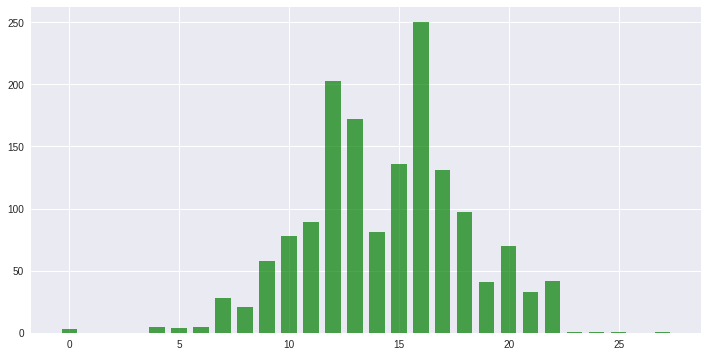

In [119]:
graph = with_stop.value_counts()

plt.figure(figsize=(12,6))
plt.bar(graph.index, graph.values, .7, color='g', alpha=.7)

In [121]:
without_stop[:10]

0    [edward, schiller, service_tech, complete, hig...
1    [product, service, impressed, job, foundation,...
2    [tried, charge, 500, replace, sump_pump, batte...
3                             [awesome, company, deal]
4    [prompt, efficient, glad, chose, company, thanks]
5                                          [time, job]
6    [ive, heard, masterdry, little, positive, neig...
7    [jeremy_kevin, extremely, nice, informative, e...
8             [service_tech, professional, inspection]
9                  [solve, quickly, price, affordable]
dtype: object

In [122]:
ap_text_list = list(without_stop.values)

In [123]:
len(ap_text_list)

1551

In [124]:
ap_text_list[0]

[u'edward', u'schiller', u'service_tech', u'complete', u'highly_recommend']

## topic models

In [125]:
# ! pip install gensim pyLDAvis WordCloud

### change name

In [126]:
# Importing Gensim
import gensim
from gensim import corpora

from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='hw_running120.log',filemode='w')

In [127]:

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(ap_text_list)
dictionary.save('hw120.dict')
(dictionary)

In [77]:
# gensim.models.ldamodel.LdaModel?

In [128]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in ap_text_list]
corpora.MmCorpus.serialize('hw120.mm', doc_term_matrix)

(len(doc_term_matrix))
(doc_term_matrix[100])

[(3, 1),
 (21, 1),
 (24, 1),
 (43, 1),
 (62, 1),
 (103, 1),
 (212, 2),
 (222, 1),
 (223, 1),
 (359, 1),
 (376, 1),
 (383, 1),
 (393, 1),
 (398, 1),
 (485, 1),
 (568, 1),
 (583, 1),
 (929, 1),
 (984, 1),
 (1071, 1),
 (1072, 1),
 (1073, 1),
 (1074, 1),
 (1075, 1),
 (1076, 1)]

In [79]:
# Lda?

In [129]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, 
#                passes=5
              )
'used: {:.2f}s'.format(time()-start)

'used: 6.61s'

In [130]:
ldamodel.print_topics()

[(0,
  u'0.022*"job" + 0.015*"basement" + 0.014*"crew" + 0.011*"company" + 0.010*"time" + 0.010*"professional" + 0.008*"day" + 0.007*"system" + 0.007*"home" + 0.006*"house"'),
 (1,
  u'0.015*"company" + 0.012*"basement" + 0.011*"professional" + 0.010*"job" + 0.010*"system" + 0.007*"time" + 0.007*"crew" + 0.006*"service" + 0.005*"thank" + 0.005*"house"'),
 (2,
  u'0.013*"crew" + 0.012*"system" + 0.010*"service" + 0.010*"job" + 0.009*"home" + 0.008*"time" + 0.008*"basement" + 0.008*"professional" + 0.005*"day" + 0.005*"house"')]

In [131]:
# !pip install pyLDAvis

In [132]:
ldamodel.save('hw120.model')

## load saved model

In [133]:
from gensim.models import LdaModel
loading = LdaModel.load('hw120.model')

## plotting



In [134]:
import pyLDAvis.gensim
import gensim
from time import time
pyLDAvis.enable_notebook()

In [135]:
d = gensim.corpora.Dictionary.load('hw120.dict')
c = gensim.corpora.MmCorpus('hw120.mm')
lda = gensim.models.LdaModel.load('hw120.model')

In [136]:
start = time()

data = pyLDAvis.gensim.prepare(lda, c, d)

print ('used: {:.2f}s'.format(time()-start))

In [137]:
pyLDAvis.save_html(data,'hw120.html')


In [138]:
data

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      51.625776        1       1  0.007567 -0.024783
2      28.570790        1       2 -0.026192  0.006115
1      19.803434        1       3  0.018624  0.018669, topic_info=     Category        Freq              Term       Total  loglift  logprob
term                                                                     
903   Default  426.000000           company  426.000000  30.0000  30.0000
1409  Default  387.000000            system  387.000000  29.0000  29.0000
167   Default  309.000000           service  309.000000  28.0000  28.0000
2253  Default  418.000000      professional  418.000000  27.0000  27.0000
2680  Default  532.000000          basement  532.000000  26.0000  26.0000
3099  Default  145.000000             thank  145.000000  25.0000  25.0000
1180  Default  113.000000            repair  113.000000  24.0000  24.0000
2686  Default  106.000000         courteous  106.000000  23.0000  23.0000
3233  Default   66.000000        technician   66.000000  22.0000  22.0000
3195  Default  296.000000              home  296.000000  21.0000  21.0000
124   Default   66.000000  customer_service   66.000000  20.0000  20.0000
181   Default  106.000000           project  106.000000  19.0000  19.0000
3345  Default  160.000000         recommend  160.000000  18.0000  18.0000
1333  Default   82.000000           process   82.000000  17.0000  17.0000
5011  Default  102.000000           install  102.000000  16.0000  16.0000
2545  Default   50.000000              help   50.000000  15.0000  15.0000
5001  Default  102.000000         excellent  102.000000  14.0000  14.0000
51    Default  136.000000         explained  136.000000  13.0000  13.0000
1940  Default  121.000000            thanks  121.000000  12.0000  12.0000
3897  Default   71.000000              pump   71.000000  11.0000  11.0000
3433  Default  163.000000  highly_recommend  163.000000  10.0000  10.0000
343   Default   85.000000            people   85.000000   9.0000   9.0000
1137  Default   77.000000          concrete   77.000000   8.0000   8.0000
2728  Default  103.000000              look  103.000000   7.0000   7.0000
4674  Default   26.000000      dehumidifier   26.000000   6.0000   6.0000
6397  Default  128.000000              wall  128.000000   5.0000   5.0000
4788  Default  109.000000          finished  109.000000   4.0000   4.0000
2755  Default   50.000000               gsm   50.000000   3.0000   3.0000
5948  Default   73.000000           cleaned   73.000000   2.0000   2.0000
2717  Default   26.000000       maintenance   26.000000   1.0000   1.0000
...       ...         ...               ...         ...      ...      ...
2253   Topic3   89.884843      professional  418.379687   0.0815  -4.5531
5011   Topic3   29.329344           install  102.462221   0.3684  -5.6731
3897   Topic3   21.793997              pump   71.240177   0.4349  -5.9700
2680   Topic3  101.357540          basement  532.366980  -0.0394  -4.4330
911    Topic3   11.834788        installing   32.756638   0.6013  -6.5806
5001   Topic3   26.840666         excellent  102.468639   0.2797  -5.7617
343    Topic3   23.062698            people   85.588264   0.3080  -5.9134
2111   Topic3    6.094034             heard   13.961636   0.7903  -7.2443
2728   Topic3   25.698160              look  103.071523   0.2303  -5.8052
3433   Topic3   35.587846  highly_recommend  163.134419   0.0967  -5.4796
3345   Topic3   34.283158         recommend  160.388161   0.0764  -5.5170
51     Topic3   30.616177         explained  136.883346   0.1217  -5.6301
1180   Topic3   26.635787            repair  113.812122   0.1670  -5.7694
4253   Topic3   10.951717          pleasant   31.602651   0.5596  -6.6581
4788   Topic3   25.659525          finished  109.547721   0.1679  -5.8067
2281   Topic3   12.004001           concern   36.410472   0.5097  -6.5664
2782   Topic3   25.139390   basement_system  108.147105   0.1

## wordcloud